In [2]:
import pandas_datareader.data as web
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from BlackScholesModel import BlackScholesModel

In [3]:
# Tunable parameters
startDate = dt.datetime(2020,10,9)
endDate = dt.datetime(2021,10,9)
tickerCode = 'TSLA'
source = 'yahoo'

In [4]:
df = web.DataReader(tickerCode, source, startDate, endDate)
df = df.sort_values(by='Date')
df = df.dropna()
print(df)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-10-08  439.000000  425.299988  438.440002  425.920013  40421100   
2020-10-09  434.589996  426.459991  430.130005  434.000000  28925700   
2020-10-12  448.739990  438.579987  442.000000  442.299988  38791100   
2020-10-13  448.890015  436.600006  443.350006  446.649994  34463700   
2020-10-14  465.899994  447.350006  449.779999  461.299988  47879700   
...                ...         ...         ...         ...       ...   
2021-10-04  806.969971  776.119995  796.500000  781.530029  30483300   
2021-10-05  797.309998  774.200012  784.799988  780.590027  18432600   
2021-10-06  786.659973  773.219971  776.200012  782.750000  14632800   
2021-10-07  805.000000  783.380005  785.460022  793.609985  19195800   
2021-10-08  796.380005  780.909973  796.210022  785.489990  16711100   

             Adj Close  
Date                    
2020-10-08  4

In [5]:
df = df.assign(Prev = df.Close.shift(1))
df['Change'] = ((df.Close - df.Prev)/df.Prev)
print(df)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2020-10-08  439.000000  425.299988  438.440002  425.920013  40421100   
2020-10-09  434.589996  426.459991  430.130005  434.000000  28925700   
2020-10-12  448.739990  438.579987  442.000000  442.299988  38791100   
2020-10-13  448.890015  436.600006  443.350006  446.649994  34463700   
2020-10-14  465.899994  447.350006  449.779999  461.299988  47879700   
...                ...         ...         ...         ...       ...   
2021-10-04  806.969971  776.119995  796.500000  781.530029  30483300   
2021-10-05  797.309998  774.200012  784.799988  780.590027  18432600   
2021-10-06  786.659973  773.219971  776.200012  782.750000  14632800   
2021-10-07  805.000000  783.380005  785.460022  793.609985  19195800   
2021-10-08  796.380005  780.909973  796.210022  785.489990  16711100   

             Adj Close        Prev    Change  
Date            

In [6]:
# Tunable Parameters for the Black-Scholes Model here.
# Calculate the volatility
nTradingDays = len(df)
sigma = np.sqrt(nTradingDays) * df.Change.std()

# The risk-free interest rate used is the 10-Years U.S. Treasury Yield at 8th Oct 2021 which is 1.613%
# Obtained from: https://www.marketwatch.com/investing/bond/tmubmusd10y?countrycode=bx
# Change for future use
r = 0.01613

# The spot price used is the current stock's closing price
# Find the value at finance.yahoo.com.
# Change for future use
s = 785.49

# The calculation for the time to maturity parameter.
# Change as desired for future use.
currDatetime = dt.datetime.now()
day = 5
month = 11
year = 2021
maturityDatetime = dt.datetime(year,month,day)
timeToMaturity = np.busday_count(currDatetime.date(), maturityDatetime.date())
tradingDaysPerYear = 252 # normally, sometimes 253 but resulting in negligible difference
T = timeToMaturity/tradingDaysPerYear

In [7]:
# Open the options csv file obtained from options_price_retriever.py
# For the example, we use TSLA call options with expiration date on 5th Nov 2021
# Change for future use.

optionsFilename = "TSLA-20211105-calls.csv"
optionsdf = pd.read_csv(optionsFilename)
print(optionsdf)

     Unnamed: 0       contractSymbol  strike currency  lastPrice  change  \
0             0  TSLA211105C00250000     250      USD     532.20    0.00   
1             1  TSLA211105C00390000     390      USD     399.05    0.00   
2             2  TSLA211105C00430000     430      USD     362.05    0.00   
3             3  TSLA211105C00480000     480      USD     325.90    0.00   
4             4  TSLA211105C00500000     500      USD     288.00    0.00   
..          ...                  ...     ...      ...        ...     ...   
96           96  TSLA211105C01350000    1350      USD       0.21   -0.04   
97           97  TSLA211105C01375000    1375      USD       0.11    0.00   
98           98  TSLA211105C01400000    1400      USD       0.14    0.04   
99           99  TSLA211105C01425000    1425      USD       0.06    0.00   
100         100  TSLA211105C01450000    1450      USD       0.04   -0.09   

     percentChange  openInterest     bid     ask contractSize  expiration  \
0         

In [8]:
# filter relevant columns for clarity
optionsdf = optionsdf.loc[:,"contractSymbol":"ask"]
print(optionsdf)

          contractSymbol  strike currency  lastPrice  change  percentChange  \
0    TSLA211105C00250000     250      USD     532.20    0.00       0.000000   
1    TSLA211105C00390000     390      USD     399.05    0.00       0.000000   
2    TSLA211105C00430000     430      USD     362.05    0.00       0.000000   
3    TSLA211105C00480000     480      USD     325.90    0.00       0.000000   
4    TSLA211105C00500000     500      USD     288.00    0.00       0.000000   
..                   ...     ...      ...        ...     ...            ...   
96   TSLA211105C01350000    1350      USD       0.21   -0.04     -16.000002   
97   TSLA211105C01375000    1375      USD       0.11    0.00       0.000000   
98   TSLA211105C01400000    1400      USD       0.14    0.04      39.999996   
99   TSLA211105C01425000    1425      USD       0.06    0.00       0.000000   
100  TSLA211105C01450000    1450      USD       0.04   -0.09     -69.230774   

     openInterest     bid     ask  
0              

In [9]:
strikePrices = optionsdf.strike.tolist()
callPrices = [BlackScholesModel(s,K,T,r,sigma).callPrice() for K in strikePrices]

In [10]:
optionsdf['blackScholesPrice'] = callPrices
print(optionsdf)

          contractSymbol  strike currency  lastPrice  change  percentChange  \
0    TSLA211105C00250000     250      USD     532.20    0.00       0.000000   
1    TSLA211105C00390000     390      USD     399.05    0.00       0.000000   
2    TSLA211105C00430000     430      USD     362.05    0.00       0.000000   
3    TSLA211105C00480000     480      USD     325.90    0.00       0.000000   
4    TSLA211105C00500000     500      USD     288.00    0.00       0.000000   
..                   ...     ...      ...        ...     ...            ...   
96   TSLA211105C01350000    1350      USD       0.21   -0.04     -16.000002   
97   TSLA211105C01375000    1375      USD       0.11    0.00       0.000000   
98   TSLA211105C01400000    1400      USD       0.14    0.04      39.999996   
99   TSLA211105C01425000    1425      USD       0.06    0.00       0.000000   
100  TSLA211105C01450000    1450      USD       0.04   -0.09     -69.230774   

     openInterest     bid     ask  blackScholesPric

In [11]:
# Compare with the Ask price
optionsdf['difference'] = ((optionsdf.blackScholesPrice - optionsdf.ask)/(optionsdf.blackScholesPrice))*100
print(optionsdf.iloc[:50].difference.describe())

count    50.000000
mean     -2.224054
std       5.971571
min      -7.461914
25%      -6.535204
50%      -4.028684
75%      -0.906146
max      16.229582
Name: difference, dtype: float64


/Users/mariolorenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


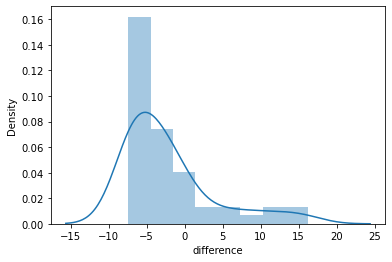

In [12]:
ax = sns.distplot(optionsdf.iloc[:50].difference)

Text(0, 0.5, 'Density')

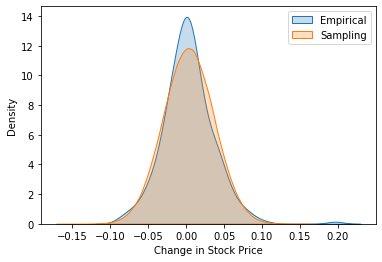

In [15]:
# Examine the distribution

std = df.Change.std()
samples = np.random.normal(df.Change.mean() ,std, size=1000000)
fig, ax = plt.subplots()
ax = sns.kdeplot(data=df.Change.dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=samples, label='Sampling', ax=ax,shade=True)
plt.legend()
plt.xlabel('Change in Stock Price')
plt.ylabel('Density')